<a href="https://colab.research.google.com/github/NantoCaparachin/clusterizacion/blob/main/Clustering_Dendograma_Distritos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Análisis Clúster Jerárquico**

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
np.random.seed(123)
variables = ["X","Y","Z"]
labels = ["ID_0","ID_1","ID_2","ID_3","ID_4"]
X = np.random.random_sample([5,3])*10

**Escalar los datos**

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc= StandardScaler()

In [ ]:
X_s = sc.fit_transform(X)

In [ ]:
X_s

array([[ 0.39870619, -0.52926569, -1.38305084],
       [-0.28520859,  1.20139722, -0.17532525],
       [ 1.73820083,  1.06305258,  0.18052434],
       [-1.0352881 , -0.30146052,  1.70740628],
       [-0.81641034, -1.43372359, -0.32955452]])

In [ ]:
df = pd.DataFrame(X_s,
                 columns=variables,
                 index=labels)

In [ ]:
df

,X,Y,Z
ID_0,0.398706,-0.529266,-1.383051
ID_1,-0.285209,1.201397,-0.175325
ID_2,1.738201,1.063053,0.180524
ID_3,-1.035288,-0.301461,1.707406
ID_4,-0.816410,-1.433724,-0.329555


In [ ]:
from scipy.spatial.distance import pdist, squareform

In [ ]:
pd.DataFrame(squareform(pdist(df.iloc[:,0:2], metric="euclidean")),
            columns=labels,
            index=labels)

,ID_0,ID_1,ID_2,ID_3,ID_4
ID_0,0.000000,1.860896,2.080799,1.451976,1.514778
ID_1,1.860896,0.000000,2.028133,1.679643,2.688129
ID_2,2.080799,2.028133,0.000000,3.090977,3.572104
ID_3,1.451976,1.679643,3.090977,0.000000,1.153225
ID_4,1.514778,2.688129,3.572104,1.153225,0.000000


In [ ]:
import matplotlib.pyplot as plt

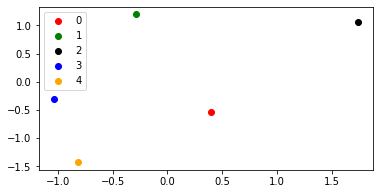

In [ ]:
fig, ax= plt.subplots(figsize=(6,3))
ax.scatter(X_s[0,0],X_s[0,1],
          label="0",color="red")
ax.scatter(X_s[1,0],X_s[1,1],
          label="1",color="green")
ax.scatter(X_s[2,0],X_s[2,1],
          label="2",color="black")
ax.scatter(X_s[3,0],X_s[3,1],
          label="3",color="blue")
ax.scatter(X_s[4,0],X_s[4,1],
          label="4",color="orange")
plt.legend()
plt.show()

In [ ]:
from scipy.cluster.hierarchy import linkage

In [ ]:
cluster = linkage(pdist(df.iloc[:,0:2], metric="euclidean"),
                 method="single")

In [ ]:
cluster

array([[3.        , 4.        , 1.15322466, 2.        ],
       [0.        , 5.        , 1.45197618, 3.        ],
       [1.        , 6.        , 1.67964302, 4.        ],
       [2.        , 7.        , 2.02813336, 5.        ]])

In [ ]:
from scipy.cluster.hierarchy import dendrogram

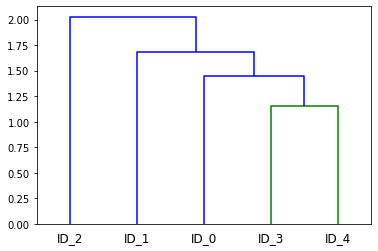

In [ ]:
dendrogram = dendrogram(cluster,
                       labels=labels)

In [ ]:
cluster = linkage(pdist(df.iloc[:,0:2], metric="euclidean"),
                 method="complete")

In [ ]:
cluster

array([[3.        , 4.        , 1.15322466, 2.        ],
       [0.        , 5.        , 1.51477796, 3.        ],
       [1.        , 2.        , 2.02813336, 2.        ],
       [6.        , 7.        , 3.57210434, 5.        ]])

In [ ]:
from scipy.cluster.hierarchy import dendrogram

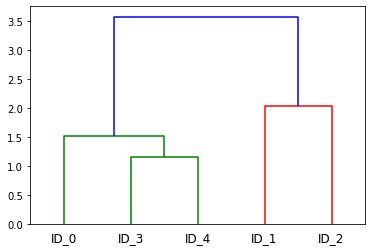

In [ ]:
dendrogram = dendrogram(cluster,
                       labels=labels)

**Sklearn**

In [ ]:
from sklearn.metrics import euclidean_distances, silhouette_score
from sklearn.cluster import AgglomerativeClustering

In [ ]:
agnes = AgglomerativeClustering(n_clusters=2,
                               affinity="euclidean",
                               linkage="single")

In [ ]:
cluster_2 = agnes.fit_predict(df.iloc[:,0:2])+1

In [ ]:
silhouette_score(df.iloc[:,0:2],cluster_2)

0.24831625694456863

In [ ]:
agnes = AgglomerativeClustering(n_clusters=2,
                               affinity="euclidean",
                               linkage="complete")

In [ ]:
cluster_2 = agnes.fit_predict(df.iloc[:,0:2])+1

In [ ]:
silhouette_score(df.iloc[:,0:2],cluster_2)

0.32047604532754737

**Caso: distritos**

In [ ]:
!pip install pyreadstat

     |████████████████████████████████| 2.4 MB 5.4 MB/s 


In [ ]:
import pyreadstat

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving distritos.sav to distritos.sav


In [ ]:
pathsav= "distritos.sav"

In [ ]:
df, meta = pyreadstat.read_sav(pathsav)

In [ ]:
df.head(10)

,distrito,ocu_vivi,pobpjov,sinelect,sinagua,pea1619,pocprin,peam15
0,Ate,1.15,5.3,27.60,51.10,3.9,1.1,63.48
1,Barranco,1.09,4.5,1.59,8.32,0.8,3.9,33.48
2,Breña,1.08,4.4,2.20,23.15,0.9,4.0,37.89
3,Carabayllo,1.10,5.1,30.13,38.09,4.5,12.6,63.65
4,Comas,1.20,5.9,10.92,24.27,3.8,9.4,60.37
5,Chorrillos,1.15,5.5,16.77,37.11,3.2,10.6,18.78
6,Agustino,1.22,6.0,16.42,41.16,4.5,13.5,55.84
7,Independencia,1.19,5.9,9.61,21.58,4.0,10.5,60.16
8,Jesús María,1.03,4.2,0.57,14.78,0.3,3.1,23.52
9,La Victoria,1.06,4.7,3.09,25.79,1.7,7.8,49.21


In [ ]:
X = df.iloc[:,1:].values

**Escalamiento**

In [ ]:
#from sklearn.preprocessing import StandardScaler

In [ ]:
#std= StandardScaler()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
mms= MinMaxScaler()

In [ ]:
X_s = mms.fit_transform(X)

**Crear el objeto distritos que guarda el nombre de los distritos**

In [ ]:
import scipy.cluster.hierarchy as agnes_2

In [ ]:
distritos=list(df["distrito"].values)

**Entrenamiento**

In [ ]:
cluster = linkage(pdist(X_s, metric="euclidean"),
                 method="complete")

**Visualización: dendrograma**

In [ ]:
from scipy.cluster.hierarchy import dendrogram

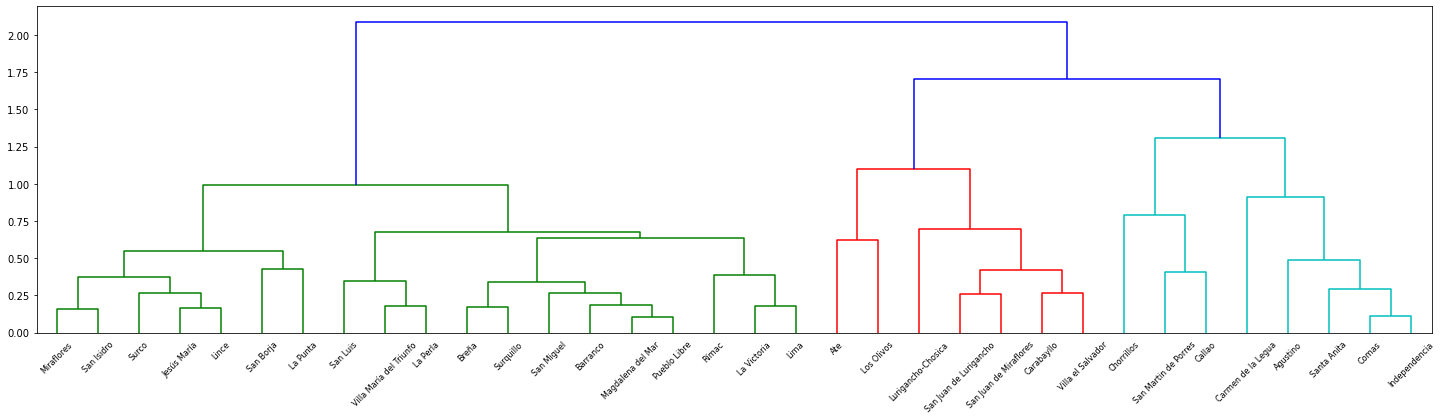

In [ ]:
fig, axes=plt.subplots(1,figsize=(25,6))
dendrograma = dendrogram(cluster, labels=distritos)

In [ ]:
cluster = linkage(pdist(X_s, metric="euclidean"),
                 method="single")

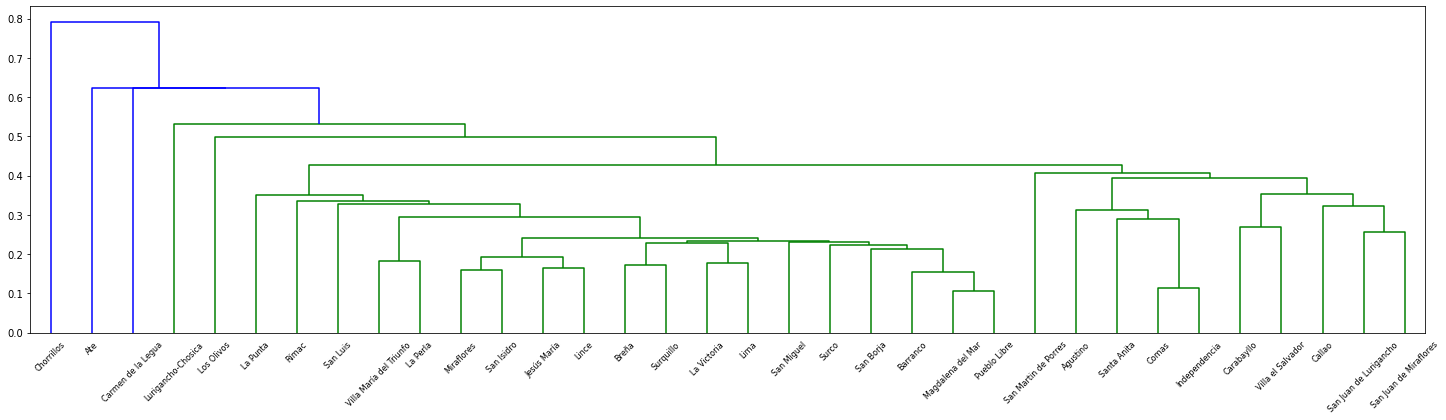

In [ ]:
fig, axes=plt.subplots(1,figsize=(25,6))
dendrograma = dendrogram(cluster, labels=distritos)

- Coef silueta Ward k=2 --> 0.486
- Coef silueta Single k=2 --> 0.073
- Coef silueta Complete k=2 -->0.492

In [ ]:
agnes = AgglomerativeClustering(n_clusters=2,
                               affinity="euclidean",
                               linkage="single")
silhouette_score(X_s,agnes.fit_predict(X_s))

0.07287470272117025

In [ ]:
sil_complete=[]
for n_clusters in range(2,11):
    agnes = AgglomerativeClustering(n_clusters=n_clusters,
                               affinity="euclidean",
                               linkage="complete")
    sil_complete.append(silhouette_score(X_s,agnes.fit_predict(X_s)))

In [ ]:
sil_complete

[0.49172652319666227,
 0.4250454651355836,
 0.3536351211317972,
 0.366308751439465,
 0.28382906907979033,
 0.28063037797590284,
 0.26081392425540534,
 0.2503590829893933,
 0.24856402572105657]

In [ ]:
sil_ward=[]
for n_clusters in range(2,11):
    agnes = AgglomerativeClustering(n_clusters=n_clusters,
                               affinity="euclidean",
                               linkage="ward")
    sil_ward.append(silhouette_score(X_s,agnes.fit_predict(X_s)))

In [ ]:
sil_ward

[0.48633154954010216,
 0.4418890736690366,
 0.32205072209287466,
 0.3261112082763609,
 0.31944576267269437,
 0.3140705817852353,
 0.3084938722746969,
 0.2972361557928647,
 0.25472540409985245]

In [ ]:
sil_single=[]
for n_clusters in range(2,11):
    agnes = AgglomerativeClustering(n_clusters=n_clusters,
                               affinity="euclidean",
                               linkage="single")
    sil_single.append(silhouette_score(X_s,agnes.fit_predict(X_s)))

In [ ]:
sil_single

[0.07287470272117025,
 0.05482467421652175,
 0.03821503833792311,
 0.04191005114646377,
 0.046315533348754254,
 0.31862784685373713,
 0.17094666935406222,
 0.22755858501558657,
 0.23168132425614005]

In [ ]:
k =[2,3,4,5,6,7,8,9,10]

In [ ]:
pd.DataFrame({"Número de clusters":k, "Silueta_complete": sil_complete, "Silueta_ward":sil_ward ,"Silueta_single":sil_single })

,Número de clusters,Silueta_complete,Silueta_ward,Silueta_single
0,2,0.491727,0.486332,0.072875
1,3,0.425045,0.441889,0.054825
2,4,0.353635,0.322051,0.038215
3,5,0.366309,0.326111,0.041910
4,6,0.283829,0.319446,0.046316
5,7,0.280630,0.314071,0.318628
6,8,0.260814,0.308494,0.170947
7,9,0.250359,0.297236,0.227559
8,10,0.248564,0.254725,0.231681


- Método de enlace (linkage) = Completo (complete)
- Número óptimo de k = 2
- Ante la presencia de valores atípicos = escalamiento por normalización